Machine Learning Project Workflow

1. Problem Statement
2. Data Collection
3. Data Cleaning
4. EDA
5. Modelling and Model Evaluation
6. Prediction






Disease Detector

Due to the limited access to health care facilities and reducing number of health professionals, we decided to build a diagnostic symptoms based model which can detect common illnesses by understanding your symptoms. Just like doctors in the hospitals would ask for your symptoms to understand a particular illnes.





Data Collection: The data used in this project is a comprehensive patient medical data collected from a health facility which we cannot mention here due to privacy reasons. 

this data is comprehensive and contains quite a number of illnesses. Due to the volume, we would be focused on 5 illnesses.


    1.Maleria
    2.Typhoid
    3.Migrane
    4.pneumonia
    5.cholestasis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('data/symbipredict_2022.csv')

In [3]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal Infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal Infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal Infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal Infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal Infection


In [4]:
df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [5]:
df["prognosis"].unique()


array(['Fungal Infection', 'Allergy', 'GERD', 'Chronic Cholestasis',
       'Drug Reaction', 'Peptic Ulcer Disease', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical Spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chickenpox', 'Dengue', 'Typhoid', 'Hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic Hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic Hemmorhoids (piles)', 'Heart Attack', 'Varicose Veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthritis', 'Arthritis', 'Vertigo', 'Acne',
       'Urinary Tract Infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4961 entries, 0 to 4960
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [7]:
df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,...,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000
mean,0.137875,0.159847,0.021971,0.045152,0.021971,0.162266,0.139085,0.045152,0.045152,0.021971,...,0.021971,0.021971,0.021971,0.023181,0.023181,0.023181,0.023181,0.023181,0.023181,0.023181
std,0.344804,0.366501,0.146605,0.207659,0.146605,0.368732,0.346070,0.207659,0.207659,0.146605,...,0.146605,0.146605,0.146605,0.150493,0.150493,0.150493,0.150493,0.150493,0.150493,0.150493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now we are going to single out each of the five casses from the data frame so we can get their symptoms

In [8]:
maleria = df["prognosis"] == 'Malaria'

data frame of only maleria casses

In [9]:
df[maleria]

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
150,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Malaria
151,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Malaria
152,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Malaria
153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Malaria
154,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Malaria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4771,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Malaria
4812,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Malaria
4853,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Malaria
4894,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Malaria


In [10]:
Migraine = df["prognosis"] == 'Migraine'

data frame containing only migraine casses

In [11]:
df[Migraine]

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
110,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Migraine
111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Migraine
112,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Migraine
113,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Migraine
114,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Migraine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4767,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Migraine
4808,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Migraine
4849,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Migraine
4890,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Migraine


In [12]:
Typhoid = df["prognosis"] == 'Typhoid'

data frame containing only typhoid casses

In [13]:
df[Typhoid]

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
180,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Typhoid
181,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Typhoid
182,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Typhoid
183,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Typhoid
184,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Typhoid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4774,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Typhoid
4815,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Typhoid
4856,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Typhoid
4897,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Typhoid


In [14]:
Pneumonia = df["prognosis"] == 'Pneumonia'

data frame containing only pneumonia casses

In [15]:
df[Pneumonia]

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
270,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pneumonia
271,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pneumonia
272,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pneumonia
273,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pneumonia
274,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pneumonia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pneumonia
4824,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pneumonia
4865,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pneumonia
4906,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pneumonia


In [16]:
Cholestasis = df["prognosis"] == 'Chronic Cholestasis'

data frame containing only cholestasis casses

In [17]:
df[Cholestasis]

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
30,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic Cholestasis
31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic Cholestasis
32,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic Cholestasis
33,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic Cholestasis
34,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic Cholestasis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4759,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic Cholestasis
4800,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic Cholestasis
4841,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic Cholestasis
4882,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic Cholestasis


Now we loop through the data frame to see every reported symptom of the five illnesses

In [18]:
mal_symp = [col for col in df.columns.drop('prognosis') if df[maleria][col].sum()>0]

In [19]:
mal_symp

['chills',
 'vomiting',
 'high_fever',
 'sweating',
 'headache',
 'nausea',
 'diarrhoea',
 'muscle_pain']

In [20]:
typh_symp = [col for col in df.columns.drop('prognosis') if df[Typhoid][col].sum()>0]

In [21]:
typh_symp

['chills',
 'vomiting',
 'fatigue',
 'high_fever',
 'headache',
 'nausea',
 'constipation',
 'abdominal_pain',
 'diarrhoea',
 'toxic_look_(typhos)',
 'belly_pain']

In [22]:
mig_symp = [col for col in df.columns.drop('prognosis') if df[Migraine][col].sum()>0]

In [23]:
mig_symp

['acidity',
 'indigestion',
 'headache',
 'blurred_and_distorted_vision',
 'excessive_hunger',
 'stiff_neck',
 'depression',
 'irritability',
 'visual_disturbances']

In [24]:
pneum_symp = [col for col in df.columns.drop('prognosis') if df[Pneumonia][col].sum()>0]

In [25]:
pneum_symp

['chills',
 'fatigue',
 'cough',
 'high_fever',
 'breathlessness',
 'sweating',
 'malaise',
 'phlegm',
 'chest_pain',
 'fast_heart_rate',
 'rusty_sputum']

In [26]:
choles_symp = [col for col in df.columns.drop('prognosis') if df[Cholestasis][col].sum()>0]

In [27]:
choles_symp

['itching',
 'vomiting',
 'yellowish_skin',
 'nausea',
 'loss_of_appetite',
 'abdominal_pain',
 'yellowing_of_eyes']

Here we trying to check the most prevailant or common symptom for each of the illness 

In [28]:
[i for i in mal_symp if df[maleria][i].sum()>100]

['chills',
 'vomiting',
 'high_fever',
 'sweating',
 'headache',
 'nausea',
 'diarrhoea',
 'muscle_pain']

In [29]:
df[maleria]['chills'].value_counts()

chills
1    115
0      6
Name: count, dtype: int64

<Axes: xlabel='chills'>

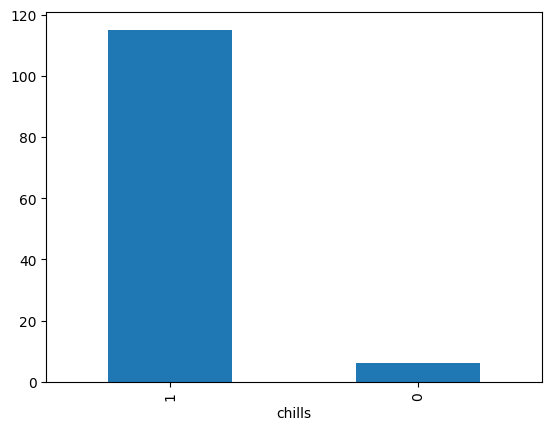

In [30]:
df[maleria]['chills'].value_counts().plot(kind='bar')

In [31]:
df[maleria]['vomiting'].value_counts()

vomiting
1    115
0      6
Name: count, dtype: int64

<Axes: xlabel='vomiting'>

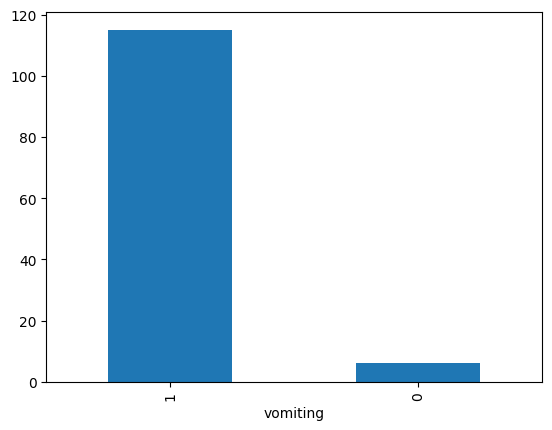

In [32]:
df[maleria]['vomiting'].value_counts().plot(kind='bar')

In [33]:
df[maleria]['nausea'].value_counts()

nausea
1    115
0      6
Name: count, dtype: int64

....

Here we want to combine all the symptoms of the five illnesses to form our unique data frame

In [34]:
dd1 = mal_symp + typh_symp + pneum_symp + mig_symp + choles_symp

In [35]:
len(dd1)

46

In [36]:
len(set(dd1))

32

In [37]:
dd1 = list(set(dd1))

In [38]:
len(dd1)

32

In [39]:
df[dd1]

,loss_of_appetite,fast_heart_rate,chills,toxic_look_(typhos),headache,muscle_pain,indigestion,cough,abdominal_pain,belly_pain,...,constipation,blurred_and_distorted_vision,excessive_hunger,itching,visual_disturbances,diarrhoea,fatigue,yellowish_skin,rusty_sputum,high_fever
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4956,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
dd1.append('prognosis')

In [41]:
list(dd1)

['loss_of_appetite',
 'fast_heart_rate',
 'chills',
 'toxic_look_(typhos)',
 'headache',
 'muscle_pain',
 'indigestion',
 'cough',
 'abdominal_pain',
 'belly_pain',
 'phlegm',
 'irritability',
 'breathlessness',
 'yellowing_of_eyes',
 'stiff_neck',
 'malaise',
 'depression',
 'chest_pain',
 'vomiting',
 'sweating',
 'nausea',
 'acidity',
 'constipation',
 'blurred_and_distorted_vision',
 'excessive_hunger',
 'itching',
 'visual_disturbances',
 'diarrhoea',
 'fatigue',
 'yellowish_skin',
 'rusty_sputum',
 'high_fever',
 'prognosis']

In [42]:
df[dd1]['prognosis'].nunique()

41

Here we can eject our unique data frame from the data frame

In [43]:
df[maleria | Typhoid | Migraine | Pneumonia | Cholestasis][dd1]

,loss_of_appetite,fast_heart_rate,chills,toxic_look_(typhos),headache,muscle_pain,indigestion,cough,abdominal_pain,belly_pain,...,blurred_and_distorted_vision,excessive_hunger,itching,visual_disturbances,diarrhoea,fatigue,yellowish_skin,rusty_sputum,high_fever,prognosis
30,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,Chronic Cholestasis
31,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,Chronic Cholestasis
32,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,Chronic Cholestasis
33,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,Chronic Cholestasis
34,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,Chronic Cholestasis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4923,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,Chronic Cholestasis
4931,0,0,0,0,1,0,1,0,0,0,...,1,1,0,1,0,0,0,0,0,Migraine
4935,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,Malaria
4938,0,0,1,1,1,0,0,0,1,1,...,0,0,0,0,1,1,0,0,1,Typhoid


In [44]:
dat = df[maleria | Typhoid | Migraine | Pneumonia | Cholestasis][dd1]

In [45]:
dat

,loss_of_appetite,fast_heart_rate,chills,toxic_look_(typhos),headache,muscle_pain,indigestion,cough,abdominal_pain,belly_pain,...,blurred_and_distorted_vision,excessive_hunger,itching,visual_disturbances,diarrhoea,fatigue,yellowish_skin,rusty_sputum,high_fever,prognosis
30,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,Chronic Cholestasis
31,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,Chronic Cholestasis
32,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,Chronic Cholestasis
33,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,Chronic Cholestasis
34,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,Chronic Cholestasis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4923,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,Chronic Cholestasis
4931,0,0,0,0,1,0,1,0,0,0,...,1,1,0,1,0,0,0,0,0,Migraine
4935,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,Malaria
4938,0,0,1,1,1,0,0,0,1,1,...,0,0,0,0,1,1,0,0,1,Typhoid


In [80]:
dat.replace([0, 1], ['No', 'Yes'], inplace=True)

In [81]:
dat

,acidity,sweating,indigestion,fatigue,yellowing_of_eyes,irritability,yellowish_skin,nausea,itching,cough,...,loss_of_appetite,diarrhoea,phlegm,depression,chills,vomiting,rusty_sputum,malaise,excessive_hunger,prognosis
30,No,No,No,No,Yes,No,Yes,Yes,Yes,No,...,Yes,No,No,No,No,Yes,No,No,No,Chronic Cholestasis
31,No,No,No,No,Yes,No,Yes,Yes,No,No,...,Yes,No,No,No,No,Yes,No,No,No,Chronic Cholestasis
32,No,No,No,No,Yes,No,Yes,Yes,Yes,No,...,Yes,No,No,No,No,No,No,No,No,Chronic Cholestasis
33,No,No,No,No,Yes,No,No,Yes,Yes,No,...,Yes,No,No,No,No,Yes,No,No,No,Chronic Cholestasis
34,No,No,No,No,Yes,No,Yes,No,Yes,No,...,Yes,No,No,No,No,Yes,No,No,No,Chronic Cholestasis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4923,No,No,No,No,Yes,No,Yes,Yes,Yes,No,...,Yes,No,No,No,No,Yes,No,No,No,Chronic Cholestasis
4931,Yes,No,Yes,No,No,Yes,No,No,No,No,...,No,No,No,Yes,No,No,No,No,Yes,Migraine
4935,No,Yes,No,No,No,No,No,Yes,No,No,...,No,Yes,No,No,Yes,Yes,No,No,No,Malaria
4938,No,No,No,Yes,No,No,No,Yes,No,No,...,No,Yes,No,No,Yes,Yes,No,No,No,Typhoid


In [82]:
import seaborn as sns


In [83]:
df[maleria | Typhoid | Migraine | Pneumonia | Cholestasis][dd1].drop('prognosis', axis=1).corr()

,acidity,sweating,indigestion,fatigue,yellowing_of_eyes,irritability,yellowish_skin,nausea,itching,cough,...,muscle_pain,loss_of_appetite,diarrhoea,phlegm,depression,chills,vomiting,rusty_sputum,malaise,excessive_hunger
acidity,1.000000,-0.379402,0.935581,-0.387430,-0.234694,0.935581,-0.234694,-0.558051,-0.234694,-0.234694,...,-0.242226,-0.234694,-0.371460,-0.234694,0.935581,-0.569492,-0.558051,-0.242226,-0.234694,0.935581
sweating,-0.379402,1.000000,-0.379402,0.134597,-0.379402,-0.379402,-0.379402,-0.152402,-0.379402,0.566520,...,0.587367,-0.379402,0.125822,0.566520,-0.379402,0.583419,-0.152402,0.587367,0.566520,-0.379402
indigestion,0.935581,-0.379402,1.000000,-0.387430,-0.234694,0.935581,-0.234694,-0.558051,-0.234694,-0.234694,...,-0.242226,-0.234694,-0.371460,-0.234694,0.935581,-0.569492,-0.558051,-0.242226,-0.234694,0.935581
fatigue,-0.387430,0.134597,-0.387430,1.000000,-0.387430,-0.387430,-0.387430,-0.134020,-0.387430,0.553951,...,-0.399864,-0.387430,0.193841,0.553951,-0.387430,0.639112,-0.134020,0.574382,0.553951,-0.387430
yellowing_of_eyes,-0.234694,-0.379402,-0.234694,-0.387430,1.000000,-0.234694,0.935581,0.369502,0.935581,-0.234694,...,-0.242226,0.935581,-0.371460,-0.234694,-0.234694,-0.569492,0.369502,-0.242226,-0.234694,-0.234694
irritability,0.935581,-0.379402,0.935581,-0.387430,-0.234694,1.000000,-0.234694,-0.558051,-0.234694,-0.234694,...,-0.242226,-0.234694,-0.371460,-0.234694,0.935581,-0.569492,-0.558051,-0.242226,-0.234694,0.935581
yellowish_skin,-0.234694,-0.379402,-0.234694,-0.387430,0.935581,-0.234694,1.000000,0.369502,0.935581,-0.234694,...,-0.242226,0.935581,-0.371460,-0.234694,-0.234694,-0.569492,0.369502,-0.242226,-0.234694,-0.234694
nausea,-0.558051,-0.152402,-0.558051,-0.134020,0.369502,-0.558051,0.369502,1.000000,0.369502,-0.558051,...,0.383974,0.369502,0.582663,-0.558051,-0.558051,0.161306,0.878595,-0.575961,-0.558051,-0.558051
itching,-0.234694,-0.379402,-0.234694,-0.387430,0.935581,-0.234694,0.935581,0.369502,1.000000,-0.234694,...,-0.242226,0.935581,-0.371460,-0.234694,-0.234694,-0.569492,0.369502,-0.242226,-0.234694,-0.234694
cough,-0.234694,0.566520,-0.234694,0.553951,-0.234694,-0.234694,-0.234694,-0.558051,-0.234694,1.000000,...,-0.242226,-0.234694,-0.371460,0.935581,-0.234694,0.360897,-0.558051,0.968904,0.935581,-0.234694


In [84]:
dat

,acidity,sweating,indigestion,fatigue,yellowing_of_eyes,irritability,yellowish_skin,nausea,itching,cough,...,loss_of_appetite,diarrhoea,phlegm,depression,chills,vomiting,rusty_sputum,malaise,excessive_hunger,prognosis
30,No,No,No,No,Yes,No,Yes,Yes,Yes,No,...,Yes,No,No,No,No,Yes,No,No,No,Chronic Cholestasis
31,No,No,No,No,Yes,No,Yes,Yes,No,No,...,Yes,No,No,No,No,Yes,No,No,No,Chronic Cholestasis
32,No,No,No,No,Yes,No,Yes,Yes,Yes,No,...,Yes,No,No,No,No,No,No,No,No,Chronic Cholestasis
33,No,No,No,No,Yes,No,No,Yes,Yes,No,...,Yes,No,No,No,No,Yes,No,No,No,Chronic Cholestasis
34,No,No,No,No,Yes,No,Yes,No,Yes,No,...,Yes,No,No,No,No,Yes,No,No,No,Chronic Cholestasis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4923,No,No,No,No,Yes,No,Yes,Yes,Yes,No,...,Yes,No,No,No,No,Yes,No,No,No,Chronic Cholestasis
4931,Yes,No,Yes,No,No,Yes,No,No,No,No,...,No,No,No,Yes,No,No,No,No,Yes,Migraine
4935,No,Yes,No,No,No,No,No,Yes,No,No,...,No,Yes,No,No,Yes,Yes,No,No,No,Malaria
4938,No,No,No,Yes,No,No,No,Yes,No,No,...,No,Yes,No,No,Yes,Yes,No,No,No,Typhoid


In [85]:
df[maleria | Typhoid | Migraine | Pneumonia | Cholestasis][dd1].select_dtypes(exclude='object').columns

Index(['acidity', 'sweating', 'indigestion', 'fatigue', 'yellowing_of_eyes',
       'irritability', 'yellowish_skin', 'nausea', 'itching', 'cough',
       'blurred_and_distorted_vision', 'stiff_neck', 'toxic_look_(typhos)',
       'chest_pain', 'abdominal_pain', 'visual_disturbances', 'high_fever',
       'fast_heart_rate', 'belly_pain', 'constipation', 'breathlessness',
       'headache', 'muscle_pain', 'loss_of_appetite', 'diarrhoea', 'phlegm',
       'depression', 'chills', 'vomiting', 'rusty_sputum', 'malaise',
       'excessive_hunger'],
      dtype='object')

In [86]:
dat

,acidity,sweating,indigestion,fatigue,yellowing_of_eyes,irritability,yellowish_skin,nausea,itching,cough,...,loss_of_appetite,diarrhoea,phlegm,depression,chills,vomiting,rusty_sputum,malaise,excessive_hunger,prognosis
30,No,No,No,No,Yes,No,Yes,Yes,Yes,No,...,Yes,No,No,No,No,Yes,No,No,No,Chronic Cholestasis
31,No,No,No,No,Yes,No,Yes,Yes,No,No,...,Yes,No,No,No,No,Yes,No,No,No,Chronic Cholestasis
32,No,No,No,No,Yes,No,Yes,Yes,Yes,No,...,Yes,No,No,No,No,No,No,No,No,Chronic Cholestasis
33,No,No,No,No,Yes,No,No,Yes,Yes,No,...,Yes,No,No,No,No,Yes,No,No,No,Chronic Cholestasis
34,No,No,No,No,Yes,No,Yes,No,Yes,No,...,Yes,No,No,No,No,Yes,No,No,No,Chronic Cholestasis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4923,No,No,No,No,Yes,No,Yes,Yes,Yes,No,...,Yes,No,No,No,No,Yes,No,No,No,Chronic Cholestasis
4931,Yes,No,Yes,No,No,Yes,No,No,No,No,...,No,No,No,Yes,No,No,No,No,Yes,Migraine
4935,No,Yes,No,No,No,No,No,Yes,No,No,...,No,Yes,No,No,Yes,Yes,No,No,No,Malaria
4938,No,No,No,Yes,No,No,No,Yes,No,No,...,No,Yes,No,No,Yes,Yes,No,No,No,Typhoid


In [53]:
X = dat.drop(columns='prognosis')

In [54]:

X

,depression,visual_disturbances,malaise,constipation,yellowing_of_eyes,irritability,belly_pain,sweating,itching,rusty_sputum,...,excessive_hunger,yellowish_skin,headache,abdominal_pain,diarrhoea,blurred_and_distorted_vision,high_fever,vomiting,nausea,indigestion
30,No,No,No,No,Yes,No,No,No,Yes,No,...,No,Yes,No,Yes,No,No,No,Yes,Yes,No
31,No,No,No,No,Yes,No,No,No,No,No,...,No,Yes,No,Yes,No,No,No,Yes,Yes,No
32,No,No,No,No,Yes,No,No,No,Yes,No,...,No,Yes,No,Yes,No,No,No,No,Yes,No
33,No,No,No,No,Yes,No,No,No,Yes,No,...,No,No,No,Yes,No,No,No,Yes,Yes,No
34,No,No,No,No,Yes,No,No,No,Yes,No,...,No,Yes,No,Yes,No,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4923,No,No,No,No,Yes,No,No,No,Yes,No,...,No,Yes,No,Yes,No,No,No,Yes,Yes,No
4931,Yes,Yes,No,No,No,Yes,No,No,No,No,...,Yes,No,Yes,No,No,Yes,No,No,No,Yes
4935,No,No,No,No,No,No,No,Yes,No,No,...,No,No,Yes,No,Yes,No,Yes,Yes,Yes,No
4938,No,No,No,Yes,No,No,Yes,No,No,No,...,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,No


In [55]:
y = dat['prognosis']

In [56]:
y

30      Chronic Cholestasis
31      Chronic Cholestasis
32      Chronic Cholestasis
33      Chronic Cholestasis
34      Chronic Cholestasis
               ...         
4923    Chronic Cholestasis
4931               Migraine
4935                Malaria
4938                Typhoid
4947              Pneumonia
Name: prognosis, Length: 605, dtype: object

In [97]:
from sklearn.preprocessing import OrdinalEncoder

In [98]:
Encode = OrdinalEncoder()

In [99]:
X = Encode.fit_transform(X)

In [100]:
X

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], shape=(605, 32))

In [102]:
X = pd.DataFrame(X, columns=dat.columns.drop('prognosis'))

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [131]:
models = {
    "Logistics Regression": LogisticRegression(),
    "Support Vector Classifier": SVC(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Gussian Naive Baiye": GaussianNB(),
    "KNN Classifier": KNeighborsClassifier()
}

In [132]:
from sklearn.metrics import accuracy_score, f1_score, precision_score

In [136]:
def evaluate_model(true, predicted):
    acc_score = accuracy_score(true, predicted)
    return acc_score


In [137]:
model_list=[]

In [138]:
X_train

,depression,visual_disturbances,malaise,constipation,yellowing_of_eyes,irritability,belly_pain,sweating,itching,rusty_sputum,...,excessive_hunger,yellowish_skin,headache,abdominal_pain,diarrhoea,blurred_and_distorted_vision,high_fever,vomiting,nausea,indigestion
235,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
353,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
429,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
106,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
435,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [122]:
t_m = LogisticRegression()

In [123]:
t_m.fit(X_train, y_train)

LogisticRegression()

In [124]:
yy_pred =  t_m.predict(X_test)

In [128]:
accuracy_score(y_test, yy_pred)

1.0

In [140]:
for i in range(len(list(models.values()))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


    train_data_acc_score = evaluate_model(y_train, y_train_pred)
    test_data_acc_score = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    print(f'{list(models.keys())[i]} model performance on training set')
    print(f'Accuracy scre : {train_data_acc_score}')



    print(list(models.keys())[i])
    print(f'{list(models.keys())[i]} model performance on test set')
    print(f'Accuracy scre : {test_data_acc_score}')






Logistics Regression
Logistics Regression model performance on training set
Accuracy scre : 1.0
Logistics Regression
Logistics Regression model performance on test set
Accuracy scre : 1.0
Support Vector Classifier
Support Vector Classifier model performance on training set
Accuracy scre : 1.0
Support Vector Classifier
Support Vector Classifier model performance on test set
Accuracy scre : 1.0
Decision Tree Classifier
Decision Tree Classifier model performance on training set
Accuracy scre : 1.0
Decision Tree Classifier
Decision Tree Classifier model performance on test set
Accuracy scre : 1.0
Gussian Naive Baiye
Gussian Naive Baiye model performance on training set
Accuracy scre : 1.0
Gussian Naive Baiye
Gussian Naive Baiye model performance on test set
Accuracy scre : 1.0
KNN Classifier
KNN Classifier model performance on training set
Accuracy scre : 1.0
KNN Classifier
KNN Classifier model performance on test set
Accuracy scre : 1.0


In [113]:
list(models.values())[1]

SVC()

Index(['blurred_and_distorted_vision', 'depression', 'muscle_pain',
       'visual_disturbances', 'sweating', 'fatigue', 'chest_pain', 'nausea',
       'loss_of_appetite', 'malaise', 'high_fever', 'rusty_sputum',
       'excessive_hunger', 'toxic_look_(typhos)', 'constipation', 'acidity',
       'headache', 'cough', 'diarrhoea', 'vomiting', 'stiff_neck',
       'yellowish_skin', 'breathlessness', 'indigestion', 'yellowing_of_eyes',
       'abdominal_pain', 'irritability', 'chills', 'fast_heart_rate', 'phlegm',
       'belly_pain', 'itching'],
      dtype='object')

In [75]:
lis

['blurred_and_distorted_vision',
 'depression',
 'muscle_pain',
 'visual_disturbances',
 'sweating',
 'fatigue',
 'chest_pain',
 'nausea',
 'loss_of_appetite',
 'malaise',
 'high_fever',
 'rusty_sputum',
 'excessive_hunger',
 'toxic_look_(typhos)',
 'constipation',
 'acidity',
 'headache',
 'cough',
 'diarrhoea',
 'vomiting',
 'stiff_neck',
 'yellowish_skin',
 'breathlessness',
 'indigestion',
 'yellowing_of_eyes',
 'abdominal_pain',
 'irritability',
 'chills',
 'fast_heart_rate',
 'phlegm',
 'belly_pain',
 'itching']

In [82]:
for col in lis:
    X[col] = le.fit_transform(X[col])

print(X)

      blurred_and_distorted_vision  depression  muscle_pain  \
30                               0           0            0   
31                               0           0            0   
32                               0           0            0   
33                               0           0            0   
34                               0           0            0   
...                            ...         ...          ...   
4923                             0           0            0   
4931                             1           1            0   
4935                             0           0            1   
4938                             0           0            0   
4947                             0           0            0   

      visual_disturbances  sweating  fatigue  chest_pain  nausea  \
30                      0         0        0           0       1   
31                      0         0        0           0       1   
32                      0         0    

,blurred_and_distorted_vision,depression,muscle_pain,visual_disturbances,sweating,fatigue,chest_pain,nausea,loss_of_appetite,malaise,...,breathlessness,indigestion,yellowing_of_eyes,abdominal_pain,irritability,chills,fast_heart_rate,phlegm,belly_pain,itching
30,0,0,0,0,0,0,0,1,1,0,...,0,0,1,1,0,0,0,0,0,1
31,0,0,0,0,0,0,0,1,1,0,...,0,0,1,1,0,0,0,0,0,0
32,0,0,0,0,0,0,0,1,1,0,...,0,0,1,1,0,0,0,0,0,1
33,0,0,0,0,0,0,0,1,1,0,...,0,0,1,1,0,0,0,0,0,1
34,0,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4923,0,0,0,0,0,0,0,1,1,0,...,0,0,1,1,0,0,0,0,0,1
4931,1,1,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4935,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4938,0,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
